In [3]:
from google.colab import drive

drive.mount('/content/drive', force_remount=False)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.7 MB/s eta 0:00:00


In [ ]:
pip install --upgrade catboost

In [ ]:
!pip install river

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 37.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.24.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.3 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=

## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
import catboost as cbt
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from river import stream
from scipy.stats import mode
import seaborn as sns
from statistics import mode
import gradio as gr

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/IT352_Project_Dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/IT352_Project_Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191033 entries, 0 to 191032
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             191033 non-null  int64  
 1    Flow Duration                191033 non-null  int64  
 2    Total Fwd Packets            191033 non-null  int64  
 3    Total Backward Packets       191033 non-null  int64  
 4   Total Length of Fwd Packets   191033 non-null  int64  
 5    Total Length of Bwd Packets  191033 non-null  int64  
 6    Fwd Packet Length Max        191033 non-null  int64  
 7    Fwd Packet Length Min        191033 non-null  int64  
 8    Fwd Packet Length Mean       191033 non-null  float64
 9    Fwd Packet Length Std        191033 non-null  float64
 10  Bwd Packet Length Max         191033 non-null  int64  
 11   Bwd Packet Length Min        191033 non-null  int64  
 12   Bwd Packet Length Mean       191033 non-nul

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/IT352_Project_Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv')
df3.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,191033.000000,1.910330e+05,191033.000000,191033.000000,1.910330e+05,1.910330e+05,191033.000000,191033.000000,191033.000000,191033.000000,...,191033.000000,191033.000000,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05
mean,6756.069988,1.164499e+07,13.826548,16.413714,5.999468e+02,2.838565e+04,174.715803,23.897646,51.877418,50.194023,...,10.323735,25.585407,8.596271e+04,5.382912e+04,1.834991e+05,5.589691e+04,3.917041e+06,1.750674e+05,4.048164e+06,3.745754e+06
std,16697.438823,3.070084e+07,1097.755533,1479.792387,7.924198e+03,3.314538e+06,554.475223,41.909942,117.031845,160.454532,...,1046.038121,6.380665,8.681320e+05,4.929487e+05,1.333719e+06,7.628561e+05,1.388267e+07,2.167443e+06,1.424123e+07,1.370477e+07
min,0.000000,-1.200000e+01,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.940000e+02,2.000000,1.000000,4.000000e+01,6.000000e+00,30.000000,0.000000,15.714286,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.112100e+04,2.000000,2.000000,7.000000e+01,1.520000e+02,42.000000,23.000000,38.112360,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,4.102840e+05,4.000000,2.000000,1.520000e+02,3.440000e+02,64.000000,42.000000,51.000000,20.124612,...,2.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,64948.000000,1.200000e+08,207964.000000,284602.000000,1.235152e+06,6.270000e+08,24820.000000,2325.000000,5940.857143,7049.469004,...,198636.000000,56.000000,1.060000e+08,5.040000e+07,1.060000e+08,1.060000e+08,1.200000e+08,7.660000e+07,1.200000e+08,1.200000e+08


In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/IT352_Project_Dataset/Monday-WorkingHours.pcap_ISCX.csv')
df5 = pd.read_csv('/content/drive/MyDrive/IT352_Project_Dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df6 = pd.read_csv('/content/drive/MyDrive/IT352_Project_Dataset/Tuesday-WorkingHours.pcap_ISCX.csv')
df7 = pd.read_csv('/content/drive/MyDrive/IT352_Project_Dataset/Wednesday-workingHours.pcap_ISCX.csv')

In [ ]:
def change_column_names(df):
  column_names = {}
  for i in df.columns:
    if i[0] == ' ':
      column_names[i] = i[1 : ]

  df.rename(columns=column_names, inplace=True)

In [ ]:
change_column_names(df1)
change_column_names(df2)
change_column_names(df3)
change_column_names(df4)
change_column_names(df5)
change_column_names(df6)
change_column_names(df7)

In [ ]:
df1.Label.value_counts()

Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

In [ ]:
df2.Label.value_counts()

Label
BENIGN    189067
Bot         1966
Name: count, dtype: int64

In [ ]:
df3.Label.value_counts()

Label
BENIGN    189067
Bot         1966
Name: count, dtype: int64

In [ ]:
df4.Label.value_counts()

Label
BENIGN    529918
Name: count, dtype: int64

In [ ]:
df5.Label.value_counts()

Label
BENIGN          288566
Infiltration        36
Name: count, dtype: int64

In [ ]:
df6.Label.value_counts()

Label
BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name: count, dtype: int64

In [ ]:
df7.Label.value_counts()

Label
BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.shape

(2564943, 79)

In [ ]:
df.Label.value_counts()

Label
BENIGN              2166441
DoS Hulk             231073
DDoS                 128027
DoS GoldenEye         10293
FTP-Patator            7938
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Bot                    3932
Infiltration             36
Heartbleed               11
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
df = df[~((df['Label'] == 'BENIGN') & (df['Min Packet Length'] == 0))]
df = df[df['Active Min'] == 0]

df.Label.value_counts()

Label
BENIGN              1232810
DoS Hulk              93900
DDoS                  77012
FTP-Patator            7938
SSH-Patator            5897
DoS GoldenEye          4561
Bot                    3928
DoS slowloris          2702
DoS Slowhttptest       1492
Infiltration             10
Heartbleed               10
Name: count, dtype: int64

In [ ]:
samples_per_label = {
    'BENIGN': 35372,
    'DoS Hulk': 22381,
    'DDoS':  9920,
    'FTP-Patator': 7938,
    'SSH-Patator': 5897,
    'DoS GoldenEye': 4561,
    'Bot': 3928,
    'DoS slowloris': 2702,
    'DoS Slowhttptest': 1492,
    'Infiltration': 10,
    'Heartbleed': 10
}

df = pd.concat([df[df['Label'] == label].sample(min(samples, len(df[df['Label'] == label])), replace=True) for label, samples in samples_per_label.items()], ignore_index=True)
df.Label.value_counts()

Label
BENIGN              35372
DoS Hulk            22381
DDoS                 9920
FTP-Patator          7938
SSH-Patator          5897
DoS GoldenEye        4561
Bot                  3928
DoS slowloris        2702
DoS Slowhttptest     1492
Infiltration           10
Heartbleed             10
Name: count, dtype: int64

In [ ]:
df.fillna(0, inplace=True)

## Mapping labels to integers

In [ ]:
integer_labels = {
    'BENIGN': 0,
    'DoS Hulk': 1,
    'DDoS':  2,
    'FTP-Patator': 3,
    'SSH-Patator': 4,
    'DoS GoldenEye': 5,
    'Bot': 6,
    'DoS slowloris': 7,
    'DoS Slowhttptest': 8,
    'Infiltration': 9,
    'Heartbleed': 10
}

In [ ]:
for i in integer_labels:
  df['Label'] = df['Label'].replace(i, integer_labels[i])

df.Label.value_counts()

<ipython-input-28-c6a12cf2db6d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace(i, integer_labels[i])


Label
0     35372
1     22381
2      9920
3      7938
4      5897
5      4561
6      3928
7      2702
8      1492
9        10
10       10
Name: count, dtype: int64

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']

In [ ]:
X.replace([np.inf, -np.inf], [1e15, -1e15], inplace=True)

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# prompt: Print only values of one row of X no headings

print(X.iloc[0].values)

[ 5.30000000e+01  5.18540000e+04  2.00000000e+00  2.00000000e+00
  8.20000000e+01  1.82000000e+02  4.10000000e+01  4.10000000e+01
  4.10000000e+01  0.00000000e+00  9.10000000e+01  9.10000000e+01
  9.10000000e+01  0.00000000e+00  5.09121765e+03  7.71396614e+01
  1.72846667e+04  2.99231988e+04  5.18370000e+04  4.00000000e+00
  1.30000000e+01  1.30000000e+01  0.00000000e+00  1.30000000e+01
  1.30000000e+01  4.00000000e+00  4.00000000e+00  0.00000000e+00
  4.00000000e+00  4.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.00000000e+01  4.00000000e+01
  3.85698307e+01  3.85698307e+01  4.10000000e+01  9.10000000e+01
  6.10000000e+01  2.73861279e+01  7.50000000e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  7.62500000e+01  4.10000000e+01  9.10000000e+01  4.00000000e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

## Training base learners

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7013
           1       1.00      1.00      1.00      4515
           2       1.00      1.00      1.00      1995
           3       1.00      1.00      1.00      1667
           4       1.00      1.00      1.00      1199
           5       0.99      0.99      0.99       875
           6       1.00      0.98      0.99       776
           7       0.99      0.98      0.98       486
           8       1.00      0.96      0.98       313
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2

    accuracy                           1.00     18843
   macro avg       1.00      0.95      0.96     18843
weighted avg       1.00      1.00      1.00     18843

Accuracy of LightGBM: 0.9967627235578199
Precision of LightGBM: 0.9967724625922949
Recall of LightGBM: 0.9967627235578199
Average F1 of LightGBM: 0.9967443884204806
F1 of LightGBM for eac

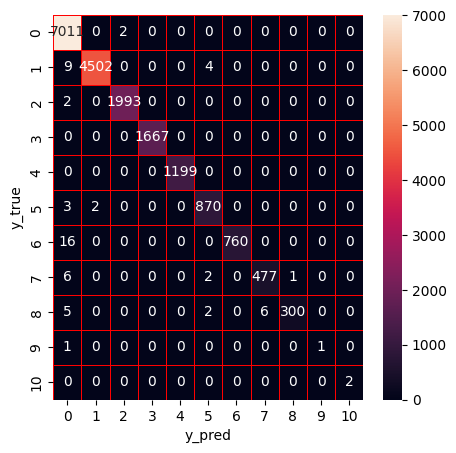

CPU times: user 34.5 s, sys: 946 ms, total: 35.4 s
Wall time: 5min 14s


In [ ]:
%%time
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [5, 9, 12],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 0.9, 1.0]
}

lg = lgb.LGBMClassifier(verbosity=-1)
random_search = RandomizedSearchCV(lg, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

lg_best = lgb.LGBMClassifier(verbosity=-1, **best_params)
lg_best.fit(X_train, y_train)

y_pred = lg_best.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy of LightGBM: " + str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: " + str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: " + str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: " + str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: " + str(f1_score(y_test, y_pred, average=None)))
lg_f1 = f1_score(y_test, y_pred, average=None)

cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7013
           1       1.00      1.00      1.00      4515
           2       1.00      1.00      1.00      1995
           3       1.00      1.00      1.00      1667
           4       1.00      1.00      1.00      1199
           5       1.00      1.00      1.00       875
           6       1.00      1.00      1.00       776
           7       0.98      1.00      0.99       486
           8       1.00      0.97      0.99       313
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2

    accuracy                           1.00     18843
   macro avg       1.00      0.95      0.97     18843
weighted avg       1.00      1.00      1.00     18843

Accuracy of XGBoost: 0.9989385978878098
Precision of XGBoost: 0.9989436208997808
Recall of XGBoost: 0.9989385978878098
Average F1 of XGBoost: 0.9989288386142307
F1 of XGBoost for each typ

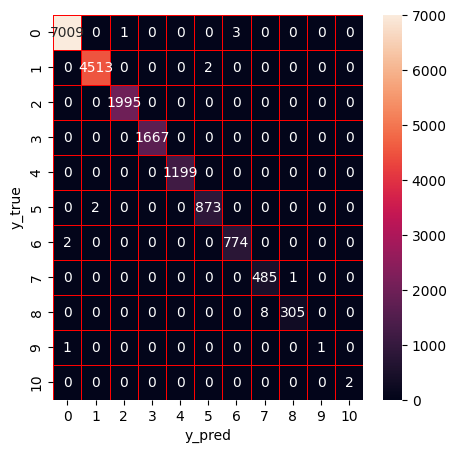

CPU times: user 39.3 s, sys: 204 ms, total: 39.5 s
Wall time: 23.3 s


In [ ]:
#XgBoost Classifier
%%time
xg = xgb.XGBClassifier()

X_train_x = X_train.values
X_test_x = X_test.values

xg.fit(X_train_x, y_train)

y_pred = xg.predict(X_test_x)
print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7013
           1       1.00      1.00      1.00      4515
           2       1.00      1.00      1.00      1995
           3       1.00      1.00      1.00      1667
           4       1.00      1.00      1.00      1199
           5       0.99      1.00      1.00       875
           6       0.99      1.00      0.99       776
           7       0.98      1.00      0.99       486
           8       1.00      0.96      0.98       313
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2

    accuracy                           1.00     18843
   macro avg       1.00      0.95      0.97     18843
weighted avg       1.00      1.00      1.00     18843

Accuracy of CatBoost: 0.9978771957756196
Precision of CatBoost: 0.9978888700698989
Recall of CatBoost: 0.9978771957756196
Average F1 of CatBoost: 0.9978640272614838
F1 of CatBoost for eac

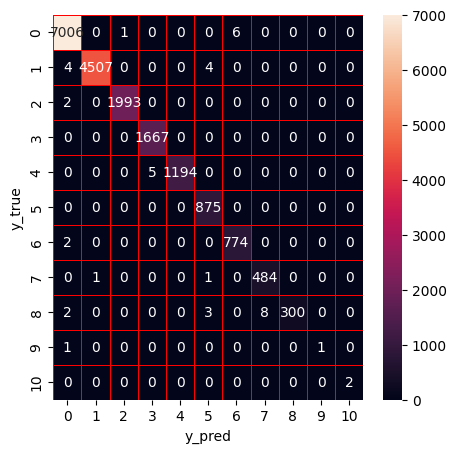

CPU times: user 1min 55s, sys: 661 ms, total: 1min 56s
Wall time: 1min 10s


In [ ]:
#CatBoost Classifier
%%time
cb = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=False)
cb.fit(X_train, y_train)

y_pred = cb.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy of CatBoost: " + str(accuracy_score(y_test, y_pred)))
print("Precision of CatBoost: " + str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of CatBoost: " + str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of CatBoost: " + str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of CatBoost for each type of attack: " + str(f1_score(y_test, y_pred, average=None)))
cb_f1 = f1_score(y_test, y_pred, average=None)

cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
lg_f1

array([0.99687189, 0.99833684, 0.99899749, 1.        , 1.        ,
       0.99258414, 0.98958333, 0.98452012, 0.9771987 , 0.66666667,
       1.        ])

In [ ]:
type(lg)

lightgbm.sklearn.LGBMClassifier

In [ ]:
def predict():
  model={}
  for i in range(len(lg_f1)):
      if max(lg_f1[i],xg_f1[i],cb_f1[i]) == lg_f1[i]:
          model[i] = f"LightGBM classifier with f1-score = {lg_f1[i]}"
      elif max(lg_f1[i],xg_f1[i],cb_f1[i]) == xg_f1[i]:
          model[i] = f"xGBoost classifier with f1-score = {xg_f1[i]}"
      else:
          model[i] = f"CatBoost classifier with f1-score = {cb_f1[i]}"
  return model

predict()

{0: 'xGBoost classifier with f1-score = 0.9995008912655972',
 1: 'xGBoost classifier with f1-score = 0.9995570321151717',
 2: 'xGBoost classifier with f1-score = 0.9997494362315209',
 3: 'LightGBM classifier with f1-score = 1.0',
 4: 'LightGBM classifier with f1-score = 1.0',
 5: 'xGBoost classifier with f1-score = 0.9977142857142857',
 6: 'xGBoost classifier with f1-score = 0.9967804249839021',
 7: 'xGBoost classifier with f1-score = 0.9908069458631257',
 8: 'xGBoost classifier with f1-score = 0.9854604200323102',
 9: 'LightGBM classifier with f1-score = 0.6666666666666666',
 10: 'LightGBM classifier with f1-score = 1.0'}

In [4]:
def get_text(input_number):
    mapping = predict()
    return mapping.get(input_number, "Unknown")
iface = gr.Interface(fn=get_text, inputs="number",
                     outputs="text", 
                     title="Best Classifier",
                     description="Enter a number to get the best classifier for that attack type.   \n0: BENIGN     \n1: DoS Hulk    \n2: DDoS    \n3: FTP-Patator     \n4: SSH-Patator      \n5: DoS GoldenEye   \n6: Bot     \n7: DoS slowloris    \n8: DoS Slowhttptest    \n9: Infiltration    \n10: Heartbleed",
                     )

# Launch the Gradio app on Hugging Face Spaces
iface.launch(share=True)

SyntaxError: keyword argument repeated: description (2303549894.py, line 8)